## Climate Data-Base from CONCITO

In [ ]:
# @title required Libaries
# Importing the required libaries for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import load_dataset
import warnings
warnings.filterwarnings("ignore")
# Import data
#data_link= "/ClimateData.xlsx"
data_link= "https://denstoreklimadatabase.dk/sites/klimadatabasen.dk/files/media/document/Results_FINAL_20210201v4.xlsx"


**Link for dataset**

In [139]:
#@title Link for datasets
#path link for dataset
# Import FRIDA Nutrient data
path_frida_data="https://github.com/mrchapagain/ConsumerDataAnalytics/raw/main/FridaNutrientData.xlsx"

# Import FRIDA Group data with Group code
path_frida_data_groups="https://github.com/mrchapagain/ConsumerDataAnalytics/raw/main/FridaNutrientData.xlsx"

# Import FRIDA AdditionalLink data
path_frida_aditional_link="https://github.com/mrchapagain/ConsumerDataAnalytics/raw/main/FridaAdditionalLinkData.xlsx"

In [ ]:
# @title Climate dataset
Output = data # @param ["data", "shape", "selected_data"] {type:"raw"}
# Loading the data into the data-frame
col_names= ["id", "Product_dk", "Category_dk", "Product_en", "Category_en", "Unit", "Agriculture", "iLUC", "Processing", "Packaging", "Transport", "Retail", "Total_CO2_eq/kg", "Energy_KJ", "Fat_g", "Carb_g", "Protein_g", "Data_Source", "Comments", "GPC_Level4_en", "ID_Food", "ID_Pack", "ID_Retail", "GPC_Category_en", "GPC_Category_dk", "GPC_Level4_dk", "product_type", "GPC_level1", "Food_group", "GPC_level2", "Un/Processed", "GPC_Level3", "Extra_category"]
# Read data with Pandas as Excel.
# Original columns name are replaced with ralavant names (col_names)
data= pd.read_excel(data_link, sheet_name=1, index_col=False, header=None, skiprows=1, names= col_names).round(decimals = 2)
data.head()

# @title Data Rows * Columns
# How big is the dataset (no of Rows, no of Columns)
shape=data.shape
shape= f'There are {shape[0]} rows and {shape[1]} columns in this dataset!'


# @title Selective data columns
# cols_to_use= ["Product_en", "Category_en", "Unit", "Agriculture", "iLUC", "Processing", "Packaging", "Transport", "Retail", "Total_CO2_eq/kg", "Energy_KJ", "Fat_g", "Carbohydrate_g", "Protein_g", "ID_Food", "ID_Pack", "ID_Retail", "product_type", "GPC_level1", "GPC_level2", "GPC_Level3"]
cols_to_use= ["Product_en", "Category_en", "Agriculture", "iLUC", "Processing", "Packaging", "Transport", "Retail", "Total_CO2_eq/kg", "Energy_KJ", "Fat_g", "Carb_g", "Protein_g"]

selected_data= data.loc[:, cols_to_use].round(decimals = 2)
selected_data.head()
Output

,id,Product_dk,Category_dk,Product_en,Category_en,Unit,Agriculture,iLUC,Processing,Packaging,...,GPC_Category_en,GPC_Category_dk,GPC_Level4_dk,product_type,GPC_level1,Food_group,GPC_level2,Un/Processed,GPC_Level3,Extra_category
0,Ra00001,"Peberfrugt, rød, rå",Grøntsager,"Pepper, sweet, red, raw",Vegetables,kg,0.25,0.03,0.00,0.14,...,Vegetables,Grøntsager,10006191,Square Tapering Sweet Peppers (Peg Top),50000000.0,Food/Beverage/Tobacco,50260000.0,Vegetables (Non Leaf) – Unprepared/Unprocessed...,50260400.0,Peppers
1,Ra00002,"Tomat, uspec., rå",Grøntsager,"Tomato, ripe, raw, origin unknown",Vegetables,kg,0.07,0.01,0.00,0.14,...,Vegetables,Grøntsager,10006165,Tomatoes – Round,50000000.0,Food/Beverage/Tobacco,50260000.0,Vegetables (Non Leaf) – Unprepared/Unprocessed...,50260300.0,Tomatoes
2,Ra00003,"Squash, rå",Grøntsager,"Squash, raw",Vegetables,kg,0.14,0.04,0.00,0.06,...,Vegetables,Grøntsager,10006355,Squash (Calabaza),50000000.0,Food/Beverage/Tobacco,50260000.0,Vegetables (Non Leaf) – Unprepared/Unprocessed...,50260700.0,Cucurbits – Edible Peel
3,Ra00004,"Aubergine, rå",Grøntsager,"Aubergine, raw",Vegetables,kg,0.16,0.02,0.00,0.14,...,Vegetables,Grøntsager,10006128,Aubergines,50000000.0,Food/Beverage/Tobacco,50260000.0,Vegetables (Non Leaf) – Unprepared/Unprocessed...,50260500.0,Solanacea/Others
4,Ra00005,"Tomat, soltørret",Grøntsager,"Tomato, dried",Vegetables,kg,0.91,0.09,-0.00,0.26,...,Vegetables,Grøntsager,10000272,Vegetables – Prepared/Processed (Shelf Stable),50000000.0,Food/Beverage/Tobacco,50100000.0,Fruits/Vegetables/Nuts/Seeds Prepared/Processed,50102100.0,Vegetables – Prepared/Processed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Ra00496,"Vegansk ost, revet eller skiver",Mælk/æg/erstatningsprodukter,"Vegan cheese, grated or sliced",Milk/eggs/substitute products,kg,0.07,0.12,0.39,0.35,...,Milk/butter/cream/yougurts/cheese/eggs/substit...,Mælk/smør/fløde/youghurt/ost/æg/erstatningspro...,10000028,Cheese (Perishable),50000000.0,Food/Beverage/Tobacco,50130000.0,Milk/Butter/Cream/Yogurts/Cheese/Eggs/Substitutes,50131800.0,Cheese/Cheese Substitutes
496,Ra00497,"Samosa, vegetarisk frost",Tilberedte/konserverede fødevarer,"Samosa, vegetarian frost",Prepared/preserved foods,kg,0.29,0.09,0.40,0.24,...,Prepared/preserved foods,Tilberedte/konserverede levnedsmidler,10006751,Ready-Made Combination Meals – Ready to Eat (P...,50000000.0,Food/Beverage/Tobacco,50190000.0,Prepared/Preserved Foods,50193800.0,Ready-Made Combination Meals
497,Ra00498,Pålægschokolade,Slik/sukkervarer,Cold chocolate,Candy/sugar products,kg,1.83,0.34,2.52,0.38,...,Confectionery/sugar sweetening products,Konfekture/sukker/sødemidler,10000045,Chocolate and Chocolate/Sugar Candy Combinatio...,50000000.0,Food/Beverage/Tobacco,50160000.0,Confectionery/Sugar Sweetening Products,50161800.0,Confectionery Products
498,Ra00499,"Nutella, nøddecreme",Slik/sukkervarer,"Nutella, nut cream",Candy/sugar products,kg,1.68,0.44,1.32,0.42,...,Confectionery/sugar sweetening products,Konfekture/sukker/sødemidler,10000045,Chocolate and Chocolate/Sugar Candy Combinatio...,50000000.0,Food/Beverage/Tobacco,50160000.0,Confectionery/Sugar Sweetening Products,50161800.0,Confectionery Products


In [ ]:
# @title Checking the data quality
# Checking the type of data in each Columns
#selected_data.info()

# @title Default title text
#"Carb_g" and "Protein_g" columns are object type so they need to changed to "float64" type
# Change column from "Object" type to "Float" type.
selected_data['Carb_g'] = pd.to_numeric(selected_data['Carb_g'], errors = 'coerce')
selected_data['Protein_g'] = pd.to_numeric(selected_data['Protein_g'], errors = 'coerce')
# Lets check the change
selected_data.info()

# @title Default title text
#  let look what is the missing value to understand it
is_NaN = selected_data[["Carb_g", "Protein_g"]].isnull()
row_has_NaN = is_NaN.any(axis=1)
selected_data[row_has_NaN]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product_en       5 non-null      object 
 1   Category_en      5 non-null      object 
 2   Agriculture      5 non-null      float64
 3   iLUC             5 non-null      float64
 4   Processing       5 non-null      float64
 5   Packaging        5 non-null      float64
 6   Transport        5 non-null      float64
 7   Retail           5 non-null      float64
 8   Total_CO2_eq/kg  5 non-null      float64
 9   Energy_KJ        5 non-null      float64
 10  Fat_g            5 non-null      float64
 11  Carb_g           5 non-null      float64
 12  Protein_g        5 non-null      float64
dtypes: float64(11), object(2)
memory usage: 648.0+ bytes


,Product_en,Category_en,Agriculture,iLUC,Processing,Packaging,Transport,Retail,Total_CO2_eq/kg,Energy_KJ,Fat_g,Carb_g,Protein_g


In [ ]:
# @title Default title text
# We Have found that row 49 have NaN value in the two columns.
# To figureout how to replace these NaN value in row 49, let have a look other neighboring rows.
selected_data[47:51]

,Product_en,Category_en,Agriculture,iLUC,Processing,Packaging,Transport,Retail,Total_CO2_eq/kg,Energy_KJ,Fat_g,Carb_g,Protein_g
47,"Pork, sausage, Danish, raw",Meat/poultry,1.57,0.27,0.13,0.14,0.10,0.0,2.21,907.0,17.4,4.7,12.2
48,"Pork, liver paste, Danish",Meat/poultry,1.68,0.31,0.22,1.18,0.13,0.0,3.51,989.0,19.2,4.7,11.3
49,"Pork, flank, spiced, cooked",Meat/poultry,2.50,0.43,0.32,0.02,0.10,0.0,3.38,854.0,22.8,NaN,NaN
50,"Pork sausage, Thüringer bratwurst",Meat/poultry,1.14,0.20,0.37,0.02,0.09,0.0,1.81,1172.0,24.5,1.1,14.4


In [ ]:
# @title Default title text
# After looking other similar rows, NaN value can be replaced with average of these rows
#selected_data[["Carb_g", 'Protein_g']][49:50].replace(np.nan, 0)
#selected_data[["Carb_g", 'Protein_g']].iloc[49:50]
#selected_data.info()

# I could not change or replace NaN value with replace() or fillna() method, which i would like to replace with 3.5 and 13.0. So i use inefficient method.
selected_data["Carb_g"].iloc[49:50]= 3.5
selected_data['Protein_g'].iloc[49:50]= 13.0
selected_data[["Carb_g", 'Protein_g']].iloc[49:50]
#"""Everything look okey by now"""

,Carb_g,Protein_g
49,3.5,13.0


In [ ]:
# @title Statistical value of the Data
# To overview the statistic on Dataset/Columns
selected_data.describe().round(decimals = 2)

,Agriculture,iLUC,Processing,Packaging,Transport,Retail,Total_CO2_eq/kg,Energy_KJ,Fat_g
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,2.21,0.59,1.01,0.34,0.25,0.01,4.41,821.45,10.00
std,8.67,1.73,2.57,0.52,0.24,0.01,9.96,710.61,16.27
min,-0.00,-0.09,-8.11,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.13,0.04,0.00,0.14,0.11,0.00,0.94,254.25,0.50
50%,0.34,0.14,0.21,0.22,0.12,0.01,1.87,635.00,2.95
75%,0.98,0.45,0.94,0.41,0.38,0.01,3.64,1210.25,12.92
max,133.45,25.85,14.51,6.55,2.07,0.03,151.95,3700.00,100.00


In [ ]:
# @title List the category of food
Output = selected_data_view # @param ["unique_value", "selected_data_view"] {type:"raw"}
# Now lets have a look, how many categories are there!
unique_value = selected_data["Category_en"].unique()
print("-----"*10)
print(f"There are {len(unique_value)} different categories:")
unique_value=print(list(unique_value))
print("-----"*10)

# @title No of Rows each food category have
# Inspect the numbers of rows for each category from "Category_en" columns
selected_data_view = selected_data['Category_en'].value_counts()

Output

--------------------------------------------------
There are 13 different categories:
['Vegetables', 'Meat/poultry', 'Beverages', 'Bread/bakery products', 'Cereal/grain/pulse products', 'Milk/eggs/substitute products', 'Seasonings/preservatives/extracts', 'Seafood', 'Fruit/vegetable products', 'Candy/sugar products', 'Prepared/preserved foods', 'Fruits', 'Oils/fats edible']
--------------------------------------------------


Fruit/vegetable products             75
Meat/poultry                         62
Prepared/preserved foods             61
Vegetables                           56
Seafood                              51
Bread/bakery products                34
Beverages                            32
Seasonings/preservatives/extracts    32
Milk/eggs/substitute products        31
Fruits                               27
Cereal/grain/pulse products          22
Candy/sugar products                 13
Oils/fats edible                      4
Name: Category_en, dtype: int64

In [ ]:
# @title Inspect the Smallest & Largest values in the columns
Output = largest # @param ["smallest", "largest"] {type:"raw"}

# Inspect the smallest & largest values in the columns
smallest= selected_data[['Product_en', "Total_CO2_eq/kg"]].groupby(by= ['Product_en'], sort=True).mean().nsmallest(5, ["Total_CO2_eq/kg"])

# @title Inspect the smallest & largest values in the columns
largest= selected_data[['Product_en', "Total_CO2_eq/kg"]].groupby(by= ['Product_en'], sort=True).mean().nlargest(5, ["Total_CO2_eq/kg"])
Output

,Total_CO2_eq/kg
Product_en,
"Beef, fillet, defatted, raw",151.95
"Beef, T-bone steak, raw",80.89
"Veal, medium fat, raw",50.36
"Roastbeef, sliced",45.84
"Beef, rump, raw",45.69


"Beef, fillet, defatted, raw" row have very high difference with other row. so during the EDA process this row is counted as outlier. to have better overview and analytics, this row should be dropped.

---

On the other hand "Water, tap, drinking, average values" row have 0 value so, we have no use of this row, so also will dorp this row.

In [ ]:
# @title Check the data Rows & Columns again
to_drop1= selected_data[selected_data["Product_en"] == "Water, tap, drinking, average values"].index
to_drop2= selected_data[selected_data["Product_en"] == "Beef, fillet, defatted, raw"].index
to_drop= [to_drop1[0], to_drop2[0]]
to_drop
selected_dropped_data= selected_data.drop(labels=to_drop, inplace=False)
print(selected_dropped_data.shape)
"""Just to check the shape of the data"""

(498, 13)


'Just to check the shape of the data'

In [ ]:
# @title View data in category
# Group some of the elements from columns with categorical data
df_with_category=selected_dropped_data[['Category_en', 'Agriculture', 'iLUC', 'Processing',	'Packaging',	'Transport',	'Retail', 'Total_CO2_eq/kg']].groupby(by= ['Category_en'], sort=True).mean().sort_values(by=['Total_CO2_eq/kg'], ascending=False).round(decimals = 2)
df_with_category

,Agriculture,iLUC,Processing,Packaging,Transport,Retail,Total_CO2_eq/kg
Category_en,,,,,,,
Meat/poultry,11.05,2.27,-0.59,0.20,0.20,0.00,13.14
Seafood,0.07,1.03,7.14,0.55,0.19,0.00,8.98
Oils/fats edible,1.56,0.57,0.76,0.48,0.21,0.01,3.59
Candy/sugar products,1.35,0.29,1.29,0.45,0.14,0.01,3.53
Prepared/preserved foods,1.41,0.34,0.62,0.43,0.13,0.01,2.93
Seasonings/preservatives/extracts,0.54,0.26,1.08,0.71,0.21,0.01,2.81
Milk/eggs/substitute products,1.52,0.20,0.72,0.22,0.11,0.00,2.78
Beverages,0.74,0.34,0.26,0.69,0.54,0.01,2.58
Bread/bakery products,0.72,0.18,0.92,0.27,0.13,0.01,2.22


**Its clear that Meat/Poultry category is the top contributor of the Total_CO2_eq/kg.**

In addition,Agriculture is the one, which contributing that share of the Total_CO2_eq/kg, for most of the food categories

***Data Visualization***

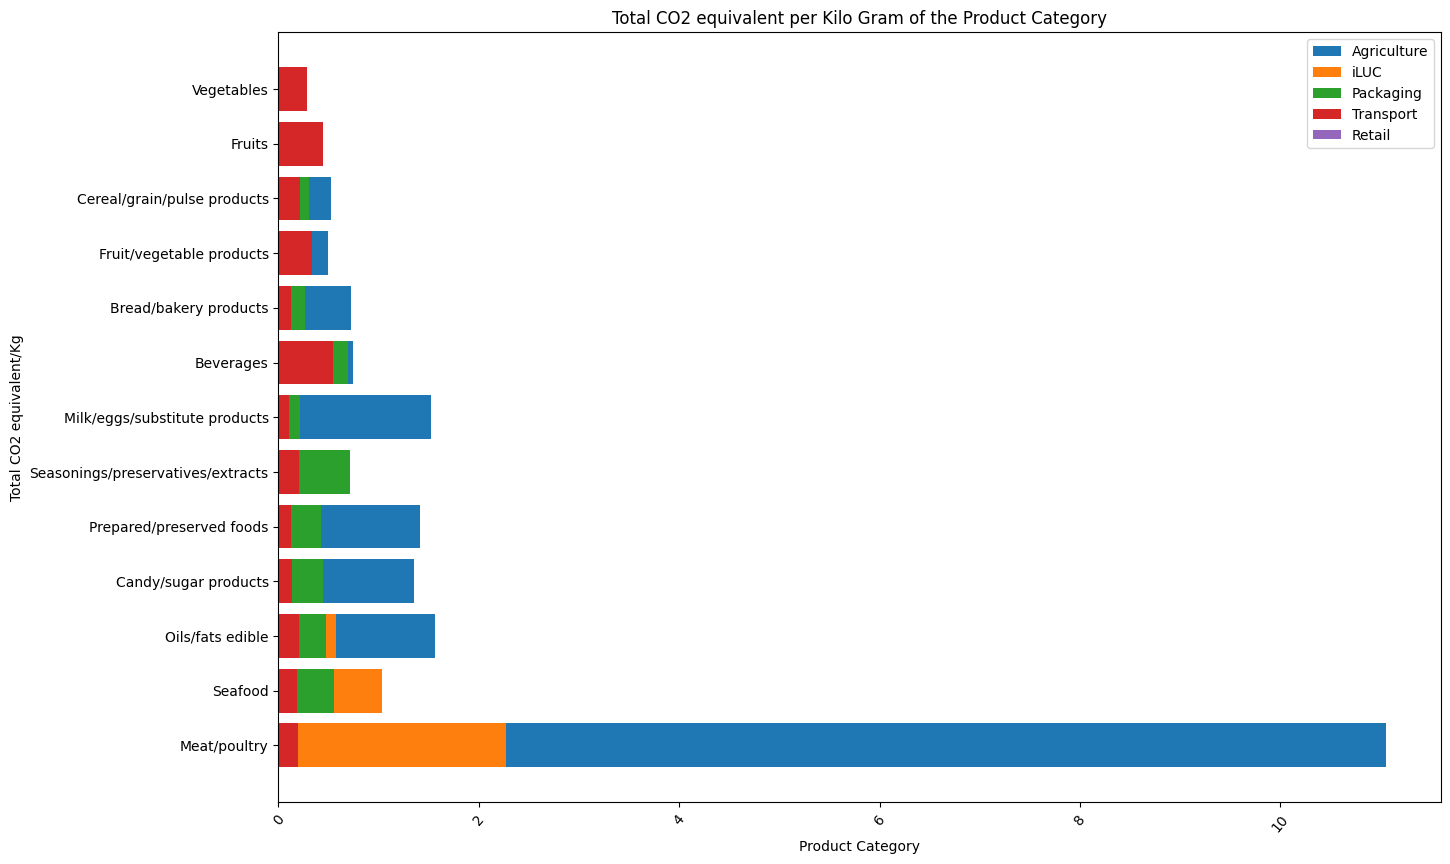

In [ ]:
# @title Bar-Plot to overview by Category
# Stacked bar plot
fig, ax= plt.subplots(figsize=(15, 10))

ax.barh(df_with_category.index, df_with_category['Agriculture'], label= "Agriculture")
ax.barh(df_with_category.index, df_with_category['iLUC'], label='iLUC')
ax.barh(df_with_category.index, df_with_category['Packaging'], label='Packaging')
ax.barh(df_with_category.index, df_with_category['Transport'], label='Transport')
ax.barh(df_with_category.index, df_with_category['Retail'], label='Retail')

plt.xticks(rotation=50)
plt.title("Total CO2 equivalent per Kilo Gram of the Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total CO2 equivalent/Kg")
ax.legend()

In [ ]:
# @title Energy content and Climate impact for each waste portion
#Calculate energy content and Climate impact for each waste portion
Fødevare_navn = input ("Enter name :")
madspild_mængden = input ("Enter amount in gm :")
print(f"Total CO2 impact from {madspild_mængden} of {Fødevare_navn} is:{madspild_mængden}")

Food-Waste Portion

In [143]:
#@title Open FridaNutrient dataset { run: "auto", vertical-output: true }
# Lets open with little modificaton so easy to read and understand
frida_nutrient= pd.read_excel(path_frida_data, sheet_name=1, index_col=None, header=None, skiprows=2).round(decimals = 3).iloc[:, :]

# Lets define and Assign columns name that defined just above
column_names= ['FoodID', 'FødevareGruppe', 'FødevareNavn', 'Svind_%', 'Energy_kj', 'Energy_kcal', 'Nitrogen_til_protein_faktor', 'Nitrogen_total_g', 'Protein_videnskabelign_g', 'Protein_deklaration_g', 'Kulhydrat_difference_g', 'Kulhydrat_tilgængelig_g', 'Kulhydrat_deklaration_g', 'Tilsat_sukker_g', 'Kostfibre_g',
               'Fedt_total_g', 'FCF', 'Alkohol_g', 'Aske_g', 'Tørstof_g', 'Vand_g', 'A_vitamin_RE', 'Retinol_µg', 'beta_caroten_µg', 'D_vitamin_µg', 'D3_vitamin_µg', 'D2 ergocalciferol', '25-hydroxy D3-vitamin', '25-hydroxyergocalciferol', 'E-vitamin', 'alfa-tokoferol','gamma-tokoferol',
               'delta-tokoferol', 'alfa-tokotrienol','K1-vitamin', 'B1-vitamin','thiamin', 'B2-vitamin_riboflavin', 'Niacinækvivalent', 'Niacin', 'B6-vitamin', 'Pantothensyre','Biotin', 'Folat','Frit_folat', 'B12-vitamin', 'C-vitamin', 'L-ascorbinsyre', 'L-dehydroascorbinsyre', 'Svovl, S',
               'Chlorid, Cl','Natrium, Na','Kalium, K','Calcium, Ca','Magnesium, Mg','Fosfor, P','Jern, Fe','Kobber, Cu','Zink, Zn','Jod, I','Mangan, Mn', 'Chrom, Cr', 'Selen, Se', 'Molybdæn, Mo', 'Cobolt, Co', 'Nikkel, Ni', 'Fluor, F', 'Silicium, Si', 'Rubidium, Rb', 'Aluminium, Al',
               'Bor, B', 'Brom, Br', 'Kviksølv, Hg', 'Arsen, As', 'Arsen_uorganisk', 'Cadmium, Cd', 'Bly, Pb', 'Tin, Sn', 'L-mælkesyre', 'D-mælkesyre', 'Mælkesyre_total', 'Citronsyre', 'Oxalsyre','Æblesyre', 'Benzoesyre', 'Organiske syrer_total', 'Histamin', 'Tyramin', 'Phenylethylamin',
               'Putrescin', 'Cadaverin', 'Spermin', 'Spermidin', 'Serotonin', 'Fruktose', 'Galaktose', 'Glukose', 'Monosaccharider_total', 'Laktose', 'Maltose', 'Sakkarose', 'Disaccharider_total', 'Raffinose', 'Andre sukkerarter', 'Sukkerarter_ialt', 'Sorbitol', 'Inositol', 'Maltitol',
               'Sukkeralkoholer_total', 'Stivelse', 'IDF','SDFP','SDFS', 'Hexose','Pentose', 'Uronic_Acid','Cellulose', 'Lignin','Crude_fibre', 'Neutr.Det.Fibre (NDF)', 'C4:0',  'C6:0', 'C8:0', 'C10:0', 'C12:0', 'C13:0', 'C14:0', 'C15:0','C16:0', 'C17:0', 'C18:0', 'C20:0', 'C21:0', 'C22:0',
               'C23:0', 'C24:0', 'Andre mættede fedtsyrer', 'C12:1,n-1', 'C14:1,n-5', 'C15:1', 'C16:1,n-7', 'C17:1,n-7', 'C18:1,n-9', 'C18:1,n-7', 'C20:1,n-9', 'C20:1,n-11', 'C22:1,n-9', 'C22:1,n-11', 'C24:1,n-9', 'Andre monoumættede fedtsyrer', 'C18:2,n-6', 'C18:2,conjugerede',
               'C18:3,n-3 (ALA)', 'C18:3,n-6', 'C18:4,n-3', 'C20:2,n-6', 'C22:2,n-6', 'C22:4,n-6', 'C22:5,n-6', 'C20:3,n-3', 'C20:4,n-3', 'C20:3,n-6', 'C20:4,n-6', 'C20:5,n-3 (EPA)', 'C22:5,n-3', 'C22:6,n-3 (DHA)', 'Andre polyumættede', 'C14:1,trans', 'C16:1,trans', 'C18:1,trans',
               'C20:1,trans', 'C22:1,trans', 'C18:2,trans', 'Andre fedtsyrer', 'Sum_mættede', 'Sum_monoumættede', 'Sum_polyumættede', 'Transfedtsyrer_total', 'Fedtsyrer-total', 'Sum n-3 fedtsyrer', 'Sum n-6 fedtsyrer', 'Cholesterol', 'Isoleucin', 'Leucin', 'Lysin', 'Methionin', 'Cystin',
               'Phenylalanin', 'Tyrosin', 'Threonin', 'Tryptofan', 'Valin', 'Arginin', 'Histidin', 'Alanin', 'Asparaginsyre', 'Glutaminsyre', 'Glycin', 'Prolin', 'Hydroxyprolin', 'Serin', 'Massefylde']
frida_nutrient.columns= column_names

# lets see frist 3 and last 3 rows od the dataset
frida_nutrient.head(3).append(frida_nutrient.tail(3))

,FoodID,FødevareGruppe,FødevareNavn,Svind_%,Energy_kj,Energy_kcal,Nitrogen_til_protein_faktor,Nitrogen_total_g,Protein_videnskabelign_g,Protein_deklaration_g,...,Arginin,Histidin,Alanin,Asparaginsyre,Glutaminsyre,Glycin,Prolin,Hydroxyprolin,Serin,Massefylde
0,1,Bærfrugt,"Jordbær, rå",4,162,38,6.25,0.106,0.7,0.7,...,40,12,31,96,90,25,23,iv,30,iv
1,2,Kernefrugt,"Æble, uspec., råt",10,233,55,6.25,0.043,0.3,0.3,...,6,4,11,78,22,8,8,iv,11,iv
2,3,Sydfrugt,"Banan, rå",41,396,93,6.25,0.183,1.1,1.1,...,49,84,35,117,106,37,38,iv,53,iv
1183,1728,Fedtrig frugt og frø,Chiafrø,iv,1837,447,iv,3.425,21.4,21.4,...,1960,525,964,1730,3350,937,754,0,1050,iv
1184,1729,Kornsorter,Perlespelt,iv,1386,329,iv,1.94,12.1,12.1,...,524,290,420,607,3830,460,1300,0,575,iv
1185,1730,Kornsorter,Perlebyg,iv,1413,335,iv,1.455,9.1,9.1,...,412,193,341,508,2070,339,959,0,383,iv


In [142]:
import seaborn as sns
# Function to display Food waste portion with user choice

def foodwaste_portion_barplot(df_frida, svind_percentage):

      ## first acess right data from the given dataset
      # Drop the rows with non numeric and change rest of the rows to float type
      df_numeric_fridasvind= df_frida["Svind_%"].drop(df_frida[df_frida["Svind_%"] == "iv"].index).astype(float)
      # Just select the desired row with waste % value
      svind_condition=df_numeric_fridasvind[df_numeric_fridasvind > svind_percentage]
      # Get whole datasetwith the condition above
      df_frida_foodwaste= df_frida[["FødevareNavn", "Svind_%"]].iloc[svind_condition.index]
      #df_frida_foodwaste= df_frida_foodwaste[df_frida_foodwaste.FødevareGruppe== food_category]
      # add column for eaten part
      df_frida_foodwaste["Spiseligt_%"] = df_frida_foodwaste["Svind_%"].apply(lambda x: 100-x)

      df_frida_foodwaste.sort_values("Svind_%", ascending=False, ignore_index=True).head(10)
      return df_frida_foodwaste

      ## code for plotting
      plt.switch_backend('AGG')
      plt.figure(figsize=(15, 5))
      #plt.title(title, fontsize=8)

      #df_frida_with_category= df_frida[df_frida.FødevareGruppe== food_category].reset_index(drop=True)
      #sns.barplot(data= df_frida_foodwaste, x= 'FødevareNavn', y='Svind_%', palette= 'hls') #{"Vegetables_Average": "blue", "Meat/Poultry_Average": "red", {foodname}: "green"}

      #Horizontal bar plot
      plt.bar(df_frida_foodwaste["FødevareNavn"], df_frida_foodwaste["Svind_%"])
      plt.xticks(rotation=20)
      plt.xlabel('FødevareNavn')
      plt.ylabel('Svind_%')
      plt.tight_layout()
      #graph=get_graph()
      #return graph
      plt.show()

df_cat=DataFrame[DataFrame.FødevareGruppe=="Sydfrugt" ].sort_values("Svind_%", ascending=False, ignore_index=True).head(10)
df_numeric_fridasvind= df_cat["Svind_%"].drop(df_cat[df_cat["Svind_%"] == "iv"].index).astype(float)
df_numeric_fridasvind
svind_condition=df_numeric_fridasvind[df_numeric_fridasvind > 0.1]
df_frida_foodwaste= df_cat[["FødevareNavn", "Svind_%"]].iloc[svind_condition.index]
df_frida_foodwaste
foodwaste_portion_barplot(df_cat, 15)

NameError: ignored

In [ ]:
# @title Bar chart of food category (Hidden)
# Bar chart
fig, ax= plt.subplots(figsize=(35, 10))
sns.barplot(selected_dropped_data["Category_en"], selected_dropped_data["Total_CO2_eq/kg"])
plt.xticks(rotation=20)
plt.title("Total CO2 equivalent per Kilo Gram of the Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total CO2 equivalent/Kg")

In [ ]:
# @title Comment on Data-Sources (hidden)
"""# Have a look the Data Source and Comments part to explore how the data were outsourced)
rep= "Data are obtained as products on the Danish crop market, where supplying countries are identified based on trade statistics"


for row, col in data[["Category_en", 'Product_en', "Data_Source", "Comments"]].iterrows():
  category= col["Category_en"]
  product= col['Product_en']
  source= col["Data_Source"]
  comment_list= col['Comments'].split(".")[1:-4]
  comment= ",".join(comment_list)
  print(f"Product: {product} (Category of product: {category})")
  print("Comment about data acquisition:", comment)
  print("Data Source:", source)
  print("---------------------------------------------------------------")
"""